In [57]:
import pandas as pd
dataset = pd.read_csv('Zoo.csv')

In [58]:
dataset.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [59]:
dataset.shape

(101, 18)

In [60]:
dataset['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [61]:
dataset['legs'].value_counts()

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [62]:
X = dataset.iloc[:,1:]

In [63]:
X = pd.get_dummies(X, columns=['legs'])

In [64]:
X.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
       'domestic', 'catsize', 'type', 'legs_0', 'legs_2', 'legs_4', 'legs_5',
       'legs_6', 'legs_8'],
      dtype='object')

In [66]:
dataset.head(3)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [67]:
y = dataset.iloc[:,-1]

In [68]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X)
X=model.transform(X)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### Train-Test-Split Method for finding k value: 

In [70]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [71]:
y_train

54    1
87    2
85    7
48    1
39    6
     ..
40    6
81    7
33    2
77    7
8     4
Name: type, Length: 80, dtype: int64

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# randomly taken k=4
# not exactly the best way
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
y_hat = model.predict(x_test)
accuracy_score(y_hat,y_test)

0.9523809523809523

### Cross Validation Method for finding the k value:

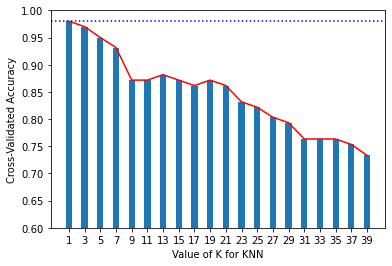

In [109]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores =[]

# using iteration to calculate different k in module, the nreturn the average accuracy
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv=20)
    k_scores.append(scores.mean())
    
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range,k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.axhline(y = 0.98, color = 'b', linestyle = ':')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

### Optimal value of k using range function with Train-Test-Split:

In [118]:
k_range = range(3,40,2)
k_scores =[]
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    scores = accuracy_score(y_test,y_hat)
    k_scores.append(scores)

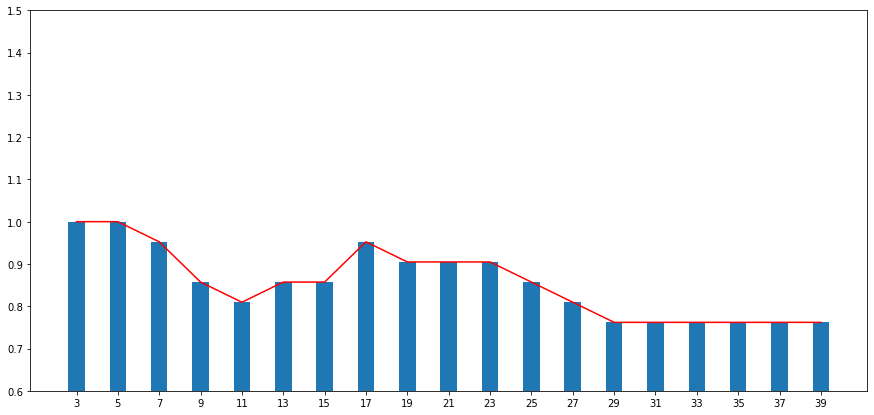

In [119]:
plt.figure(figsize=(15,7))
plt.bar(k_range,k_scores)
plt.plot(k_range,k_scores, color="red")
plt.xticks(k_range)
plt.ylim(0.6,1.5)
plt.show()